In [1]:
import os
import operator
import random
import calendar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from vixstructure.data import FuturesByMonth
from vixstructure.utils import parse_whole_directory_monthwise

mpl.rcParams["figure.figsize"] = 16, 9

In [2]:
def plot3d_loss(dataframe, zlim=None, rotation=225):
    X = dataframe.index.levels[0]
    Y = dataframe.index.levels[1]
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(
            np.array(list(map(lambda x: dataframe[x[0], x[1]], np.reshape(np.dstack((X,Y)), (X.shape[0]*X.shape[1],2))))),
            X.shape)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=None, antialiased=True, cmap=cm.coolwarm_r)
    ax.view_init(azim=rotation)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Width")
    ax.set_xlim(X[0,0], X[-1,-1])
    ax.set_ylim(Y[0,0], Y[-1,-1])
    ax.set_zlim(zlim)
    ax.set_zlabel("Loss", rotation=90)

# Diff with common structure

In [3]:
data = parse_whole_directory_monthwise("models/experiment08/")

In [4]:
min_loss = data.groupby(("depth", "width", "month")).min()
monthly_mean = min_loss.groupby(("depth", "width")).mean()

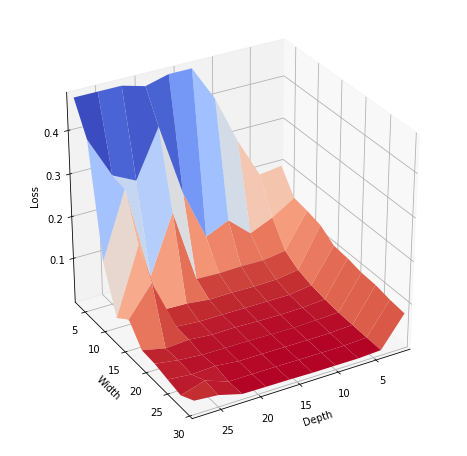

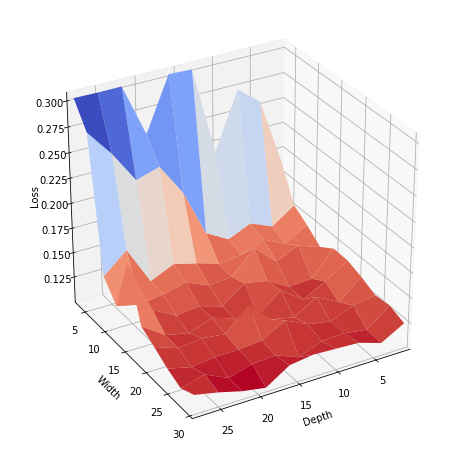

In [5]:
plot3d_loss(monthly_mean.loss, rotation=60)
plot3d_loss(monthly_mean.val_loss, rotation=60)
plt.show()

# Spreads with common structure

In [6]:
data1 = parse_whole_directory_monthwise("models/experiment08.1/")
min_loss1 = data1.groupby(("depth", "width", "month")).min()
monthly_mean1 = min_loss1.groupby(("depth", "width")).mean()

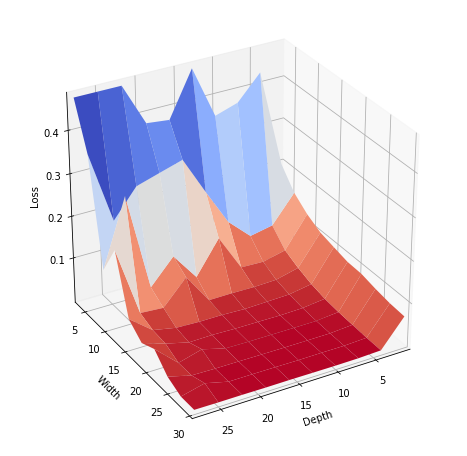

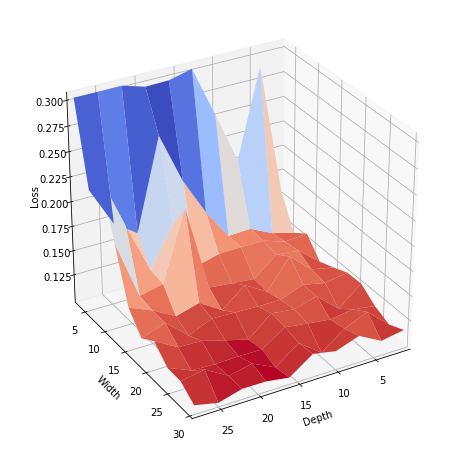

In [7]:
plot3d_loss(monthly_mean1.loss, rotation=60)
plot3d_loss(monthly_mean1.val_loss, rotation=60)
plt.show()

In [8]:
print(data.min())
print(data.idxmin())

loss        0.000643
val_loss    0.029266
dtype: float64
loss        (16, 30, 3, 2017-08-19 15:39:17, 930)
val_loss     (13, 27, 9, 2017-08-19 15:37:30, 42)
dtype: object


In [9]:
print(data1.min())
print(data1.idxmin())

loss        0.000175
val_loss    0.029992
dtype: float64
loss        (16, 30, 3, 2017-08-19 16:20:35, 963)
val_loss     (22, 21, 8, 2017-08-19 16:23:54, 27)
dtype: object


In [10]:
data1.groupby("month").min()

,loss,val_loss
month,,
1,0.002058,0.111360
2,0.000645,0.103101
3,0.000175,0.108866
4,0.001229,0.037394
5,0.000451,0.034245
6,0.000321,0.052696
7,0.003181,0.066345
8,0.000216,0.029992
9,0.000476,0.030029


# Spread with yearly structure

In [11]:
data5 = parse_whole_directory_monthwise("models/experiment08.5/")
min_loss5 = data5.groupby(("depth", "width", "month")).min()
monthly_mean5 = min_loss5.groupby(("depth", "width")).mean()

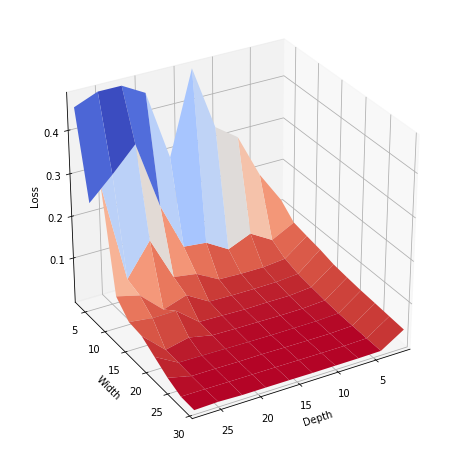

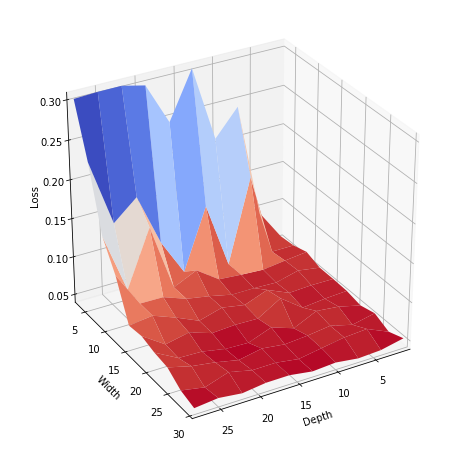

In [12]:
plot3d_loss(monthly_mean5.loss, rotation=60)
plot3d_loss(monthly_mean5.val_loss, rotation=60)
plt.show()

In [13]:
min_loss5.groupby(("depth", "width")).mean().min()

loss        0.001522
val_loss    0.044664
dtype: float64

# Diff with yearly structure

In [16]:
data6 = parse_whole_directory_monthwise("models/experiment08.6/")
min_loss6 = data6.groupby(("depth", "width", "month")).min()
monthly_mean6 = min_loss6.groupby(("depth", "width")).mean()

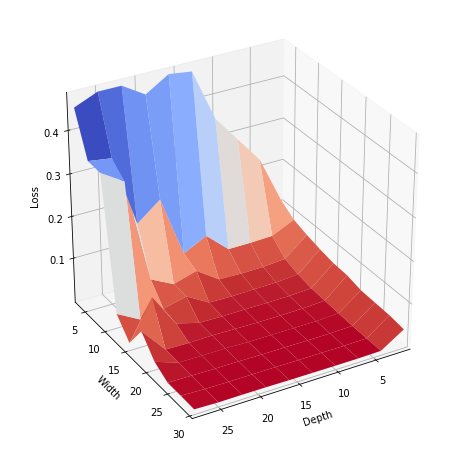

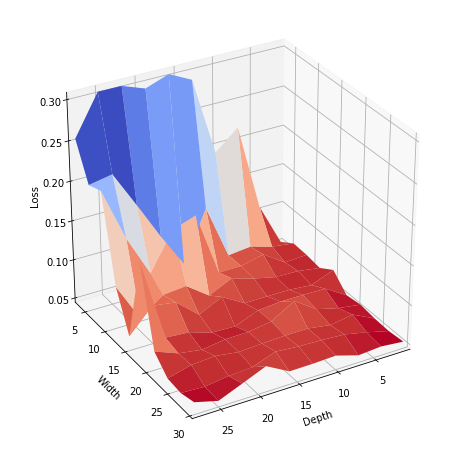

In [17]:
plot3d_loss(monthly_mean6.loss, rotation=60)
plot3d_loss(monthly_mean6.val_loss, rotation=60)
plt.show()

In [18]:
min_loss6.groupby(("depth", "width")).mean().min()

loss        0.002032
val_loss    0.049671
dtype: float64

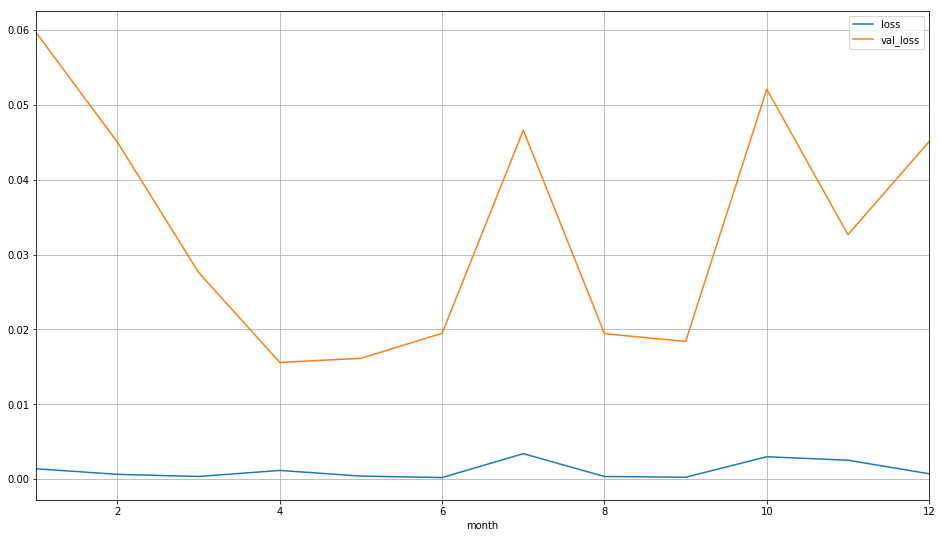

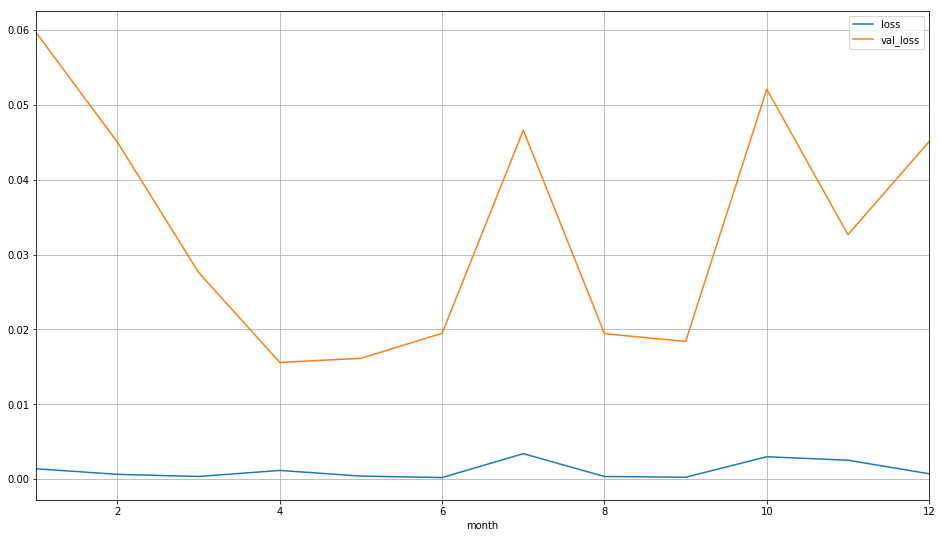

In [19]:
data5.groupby("month").min().plot()
plt.grid()
data5.groupby("month").min().plot()
plt.grid()
plt.show()

# Using spread prices on yearly structure with dropout

In [20]:
data7 = parse_whole_directory_monthwise("models/experiment08.7/")
min_loss7 = data7.groupby(("depth", "width", "month")).min()
monthly_mean7 = min_loss7.groupby(("depth", "width")).mean()

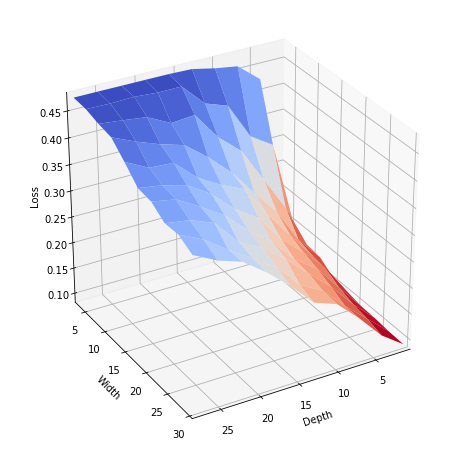

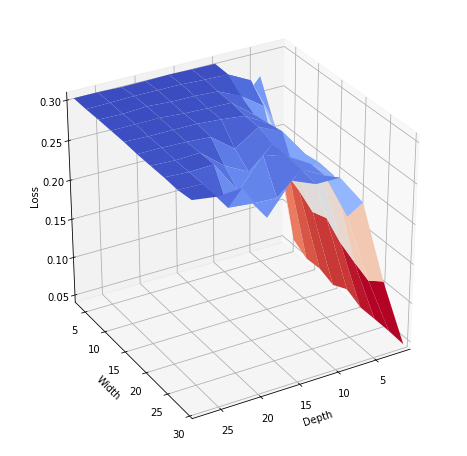

In [21]:
plot3d_loss(monthly_mean7.loss, rotation=60)
plot3d_loss(monthly_mean7.val_loss, rotation=60)
plt.show()

In [22]:
min_loss7.groupby(("depth", "width")).mean().min()

loss        0.089845
val_loss    0.045695
dtype: float64

# Now the same as above but with SeLU

In [23]:
data8 = parse_whole_directory_monthwise("models/experiment08.8/")
min_loss8 = data8.groupby(("depth", "width", "month")).min()
monthly_mean8 = min_loss8.groupby(("depth", "width")).mean()

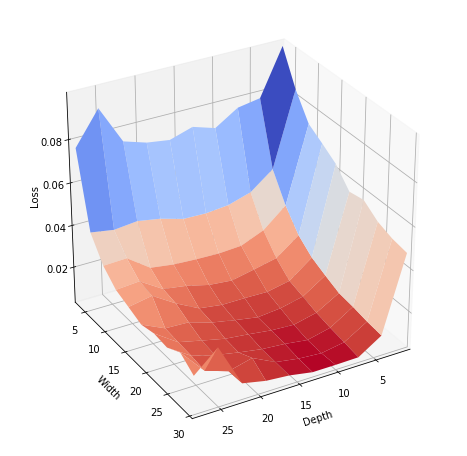

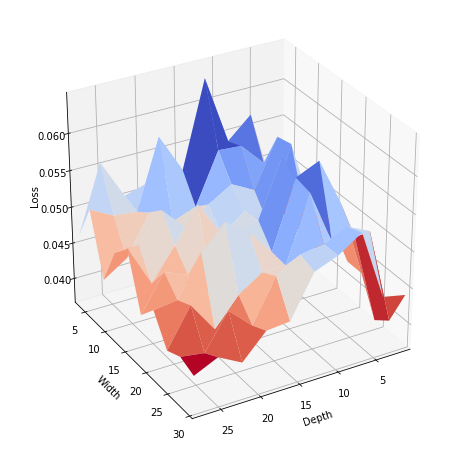

In [24]:
plot3d_loss(monthly_mean8.loss, rotation=60)
plot3d_loss(monthly_mean8.val_loss, rotation=60)
plt.show()

In [28]:
min_loss8.groupby(("depth", "width")).mean().min()

loss        0.004781
val_loss    0.037159
dtype: float64

# Simple model with spread prices and yearly structure but decreasing hidden layer width

In [29]:
data9 = parse_whole_directory_monthwise("models/experiment08.9/")
min_loss9 = data9.groupby(("depth", "width", "month")).min()
monthly_mean9 = min_loss9.groupby(("depth", "width")).mean()

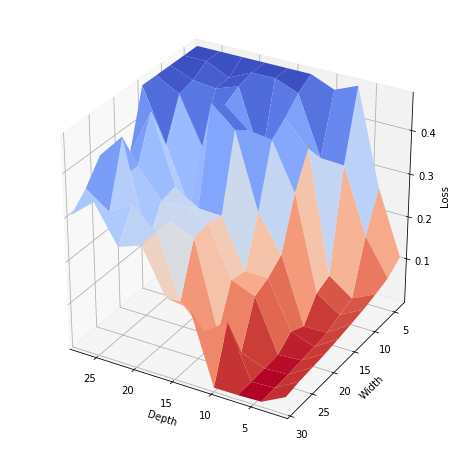

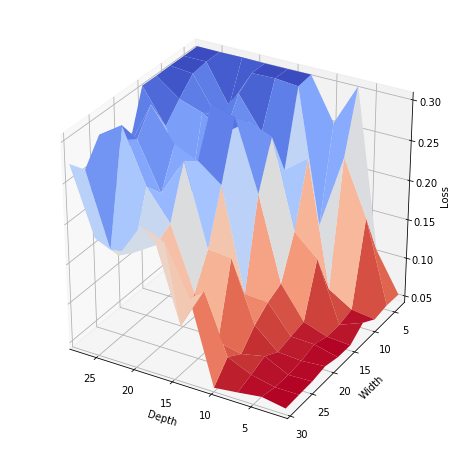

In [34]:
plot3d_loss(monthly_mean9.loss, rotation=120)
plot3d_loss(monthly_mean9.val_loss, rotation=120)
plt.show()

In [32]:
min_loss9.groupby(("depth", "width")).mean().min()

loss        0.003698
val_loss    0.046991
dtype: float64

# Now compare all the models

In [35]:
conct = pd.concat([data.groupby("month").min().val_loss,
                   data1.groupby("month").min().val_loss,
                   data5.groupby("month").min().val_loss,
                   data6.groupby("month").min().val_loss,
                   data7.groupby("month").min().val_loss,
                   data8.groupby("month").min().val_loss,
                   data9.groupby("month").min().val_loss], axis=1)

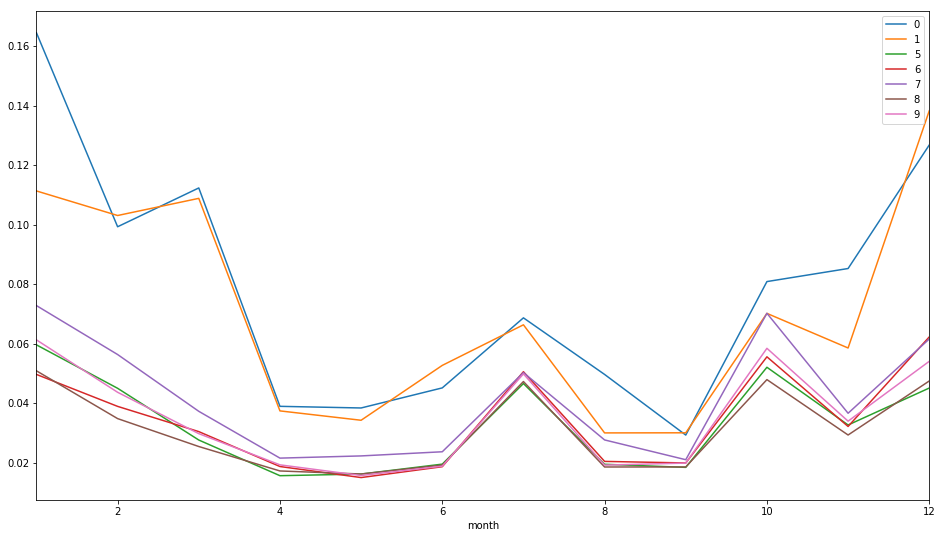

In [37]:
# Regardless of the model there are some months easier and some month harder to predict.
conct.plot()
plt.legend((0, 1, 5, 6, 7, 8, 9))
plt.show()